<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import regex as re
import spacy
import nltk
from collections import Counter

%matplotlib inline

## Load data

In [2]:
## Loading the data

input_file = '../../DATA/ncc-1701-D.txt'

# Context manager 'with'
with open(input_file, 'r') as file:
    text = file.read()

## Inspect the data

In [3]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [4]:
text = re.sub(r'[="]','', text)
print(text[:500])

USS Enterprise (NCC-1701-D)

For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

History
Construction


In [5]:
text[:500]

'USS Enterprise (NCC-1701-D)\n\nFor five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.\n\nThe USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.\n\nHistory\nConstruction'

## Helper method

In [6]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)
    
    for i, label in enumerate(val[:top]):
        plt.text(i, label, label, ha='center', va='bottom') 

    plt.show()

In [7]:
myList = [1,1,2,3,4,5,3,2,3,4,2,1,2,3]
print(Counter(myList))
print(Counter(myList).most_common())

Counter({2: 4, 3: 4, 1: 3, 4: 2, 5: 1})
[(2, 4), (3, 4), (1, 3), (4, 2), (5, 1)]


## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

Install trained English model for spaCy via conda prompt `python -m spacy download en_core_web_sm`

Alternatively, try `conda install -c conda-forge spacy-model-en_core_web_sm`

In [ ]:
# !python -m spacy download en_core_web_sm

In [8]:
# load spaCy and the English model
nlp = spacy.load('en_core_web_sm')

# Alternatively, ...
# import en_core_web_sm
# nlp = en_core_web_sm.load()

# process the text
doc = nlp(text)

In [9]:
nlp

In [10]:
doc[:100]

USS Enterprise (NCC-1701-D)

For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

History
Construction and launch

**Unpack `doc`**

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. Each `doc` consists of individual tokens, and we can iterate over them:

In [11]:
[token for token in doc]

[USS,
 Enterprise,
 (,
 NCC-1701,
 -,
 D,
 ),
 
 ,
 For,
 five,
 hundred,
 years,
 ,,
 every,
 ship,
 that,
 has,
 borne,
 the,
 name,
 of,
 the,
 Enterprise,
 has,
 become,
 a,
 legend,
 .,
 This,
 one,
 is,
 no,
 different,
 .,
 
 ,
 The,
 USS,
 Enterprise,
 (,
 NCC-1701,
 -,
 D,
 ),
 was,
 a,
 24th,
 century,
 United,
 Federation,
 of,
 Planets,
 Galaxy,
 Class,
 starship,
 operated,
 by,
 Starfleet,
 ,,
 and,
 the,
 fifth,
 Federation,
 ship,
 to,
 bear,
 the,
 name,
 Enterprise,
 .,
 During,
 her,
 career,
 ,,
 the,
 Enterprise,
 served,
 as,
 the,
 Federation,
 flagship,
 .,
 The,
 Enterprise,
 was,
 destroyed,
 during,
 the,
 Battle,
 of,
 Veridian,
 III,
 in,
 2371,
 .,
 
 ,
 History,
 ,
 Construction,
 and,
 launch,
 ,
 The,
 Enterprise,
 was,
 built,
 at,
 Utopia,
 Planitia,
 Fleet,
 Yards,
 orbiting,
 Mars,
 in,
 the,
 Solar,
 system,
 .,
 The,
 construction,
 was,
 a,
 massive,
 undertaking,
 ,,
 involving,
 thousands,
 of,
 people,
 across,
 disciplines,
 .,
 Construction,

In [12]:
[token.text for token in doc]

['USS',
 'Enterprise',
 '(',
 'NCC-1701',
 '-',
 'D',
 ')',
 '\n\n',
 'For',
 'five',
 'hundred',
 'years',
 ',',
 'every',
 'ship',
 'that',
 'has',
 'borne',
 'the',
 'name',
 'of',
 'the',
 'Enterprise',
 'has',
 'become',
 'a',
 'legend',
 '.',
 'This',
 'one',
 'is',
 'no',
 'different',
 '.',
 '\n\n',
 'The',
 'USS',
 'Enterprise',
 '(',
 'NCC-1701',
 '-',
 'D',
 ')',
 'was',
 'a',
 '24th',
 'century',
 'United',
 'Federation',
 'of',
 'Planets',
 'Galaxy',
 'Class',
 'starship',
 'operated',
 'by',
 'Starfleet',
 ',',
 'and',
 'the',
 'fifth',
 'Federation',
 'ship',
 'to',
 'bear',
 'the',
 'name',
 'Enterprise',
 '.',
 'During',
 'her',
 'career',
 ',',
 'the',
 'Enterprise',
 'served',
 'as',
 'the',
 'Federation',
 'flagship',
 '.',
 'The',
 'Enterprise',
 'was',
 'destroyed',
 'during',
 'the',
 'Battle',
 'of',
 'Veridian',
 'III',
 'in',
 '2371',
 '.',
 '\n\n',
 'History',
 '\n',
 'Construction',
 'and',
 'launch',
 '\n',
 'The',
 'Enterprise',
 'was',
 'built',
 'at',
 '

In [13]:
[token.text for token in doc if not (token.is_stop | token.is_punct)]

['USS',
 'Enterprise',
 'NCC-1701',
 'D',
 '\n\n',
 'years',
 'ship',
 'borne',
 'Enterprise',
 'legend',
 'different',
 '\n\n',
 'USS',
 'Enterprise',
 'NCC-1701',
 'D',
 '24th',
 'century',
 'United',
 'Federation',
 'Planets',
 'Galaxy',
 'Class',
 'starship',
 'operated',
 'Starfleet',
 'fifth',
 'Federation',
 'ship',
 'bear',
 'Enterprise',
 'career',
 'Enterprise',
 'served',
 'Federation',
 'flagship',
 'Enterprise',
 'destroyed',
 'Battle',
 'Veridian',
 'III',
 '2371',
 '\n\n',
 'History',
 '\n',
 'Construction',
 'launch',
 '\n',
 'Enterprise',
 'built',
 'Utopia',
 'Planitia',
 'Fleet',
 'Yards',
 'orbiting',
 'Mars',
 'Solar',
 'system',
 'construction',
 'massive',
 'undertaking',
 'involving',
 'thousands',
 'people',
 'disciplines',
 'Construction',
 'supervised',
 'Commander',
 'Orfil',
 'Quinteros',
 'Dr.',
 'Leah',
 'Brahms',
 'responsible',
 'Enterprise',
 'warp',
 'propulsion',
 'system',
 'design',
 'Enterprise',
 'components',
 'derived',
 'technology',
 'origina

In [14]:
[token.pos_ for token in doc]

['PROPN',
 'PROPN',
 'PUNCT',
 'PROPN',
 'PUNCT',
 'NOUN',
 'PUNCT',
 'SPACE',
 'ADP',
 'NUM',
 'NUM',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'PRON',
 'AUX',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'DET',
 'PROPN',
 'AUX',
 'VERB',
 'DET',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'AUX',
 'ADV',
 'ADJ',
 'PUNCT',
 'SPACE',
 'DET',
 'PROPN',
 'PROPN',
 'PUNCT',
 'PROPN',
 'PUNCT',
 'NOUN',
 'PUNCT',
 'AUX',
 'DET',
 'ADJ',
 'NOUN',
 'PROPN',
 'PROPN',
 'ADP',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'VERB',
 'ADP',
 'PROPN',
 'PUNCT',
 'CCONJ',
 'DET',
 'PROPN',
 'PROPN',
 'NOUN',
 'PART',
 'VERB',
 'DET',
 'NOUN',
 'NOUN',
 'PUNCT',
 'ADP',
 'PRON',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'VERB',
 'ADP',
 'DET',
 'PROPN',
 'NOUN',
 'PUNCT',
 'DET',
 'NOUN',
 'AUX',
 'VERB',
 'ADP',
 'DET',
 'PROPN',
 'ADP',
 'PROPN',
 'PROPN',
 'ADP',
 'NUM',
 'PUNCT',
 'SPACE',
 'NOUN',
 'SPACE',
 'PROPN',
 'CCONJ',
 'NOUN',
 'SPACE',
 'DET',
 'NOUN',
 'AUX',
 'VERB',
 'ADP',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 

In [15]:
[token.tag_ for token in doc]

['NNP',
 'NNP',
 '-LRB-',
 'NNP',
 'HYPH',
 'NN',
 '-RRB-',
 '_SP',
 'IN',
 'CD',
 'CD',
 'NNS',
 ',',
 'DT',
 'NN',
 'WDT',
 'VBZ',
 'VBN',
 'DT',
 'NN',
 'IN',
 'DT',
 'NNP',
 'VBZ',
 'VBN',
 'DT',
 'NN',
 '.',
 'DT',
 'NN',
 'VBZ',
 'RB',
 'JJ',
 '.',
 '_SP',
 'DT',
 'NNP',
 'NNP',
 '-LRB-',
 'NNP',
 'HYPH',
 'NN',
 '-RRB-',
 'VBD',
 'DT',
 'JJ',
 'NN',
 'NNP',
 'NNP',
 'IN',
 'NNPS',
 'NNP',
 'NNP',
 'NN',
 'VBN',
 'IN',
 'NNP',
 ',',
 'CC',
 'DT',
 'NNP',
 'NNP',
 'NN',
 'TO',
 'VB',
 'DT',
 'NN',
 'NN',
 '.',
 'IN',
 'PRP$',
 'NN',
 ',',
 'DT',
 'NN',
 'VBD',
 'IN',
 'DT',
 'NNP',
 'NN',
 '.',
 'DT',
 'NN',
 'VBD',
 'VBN',
 'IN',
 'DT',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'IN',
 'CD',
 '.',
 '_SP',
 'NN',
 '_SP',
 'NNP',
 'CC',
 'NN',
 '_SP',
 'DT',
 'NN',
 'VBD',
 'VBN',
 'IN',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'VBG',
 'NNP',
 'IN',
 'DT',
 'NNP',
 'NN',
 '.',
 'DT',
 'NN',
 'VBD',
 'DT',
 'JJ',
 'NN',
 ',',
 'VBG',
 'NNS',
 'IN',
 'NNS',
 'IN',
 'NNS',
 '.',
 'NN',
 'VBD',
 'VBN',
 

In [16]:
[token.lemma_ for token in doc if not (token.is_stop | token.is_punct)]

['USS',
 'Enterprise',
 'NCC-1701',
 'd',
 '\n\n',
 'year',
 'ship',
 'bear',
 'Enterprise',
 'legend',
 'different',
 '\n\n',
 'USS',
 'Enterprise',
 'NCC-1701',
 'd',
 '24th',
 'century',
 'United',
 'Federation',
 'Planets',
 'Galaxy',
 'Class',
 'starship',
 'operate',
 'Starfleet',
 'fifth',
 'Federation',
 'ship',
 'bear',
 'enterprise',
 'career',
 'enterprise',
 'serve',
 'Federation',
 'flagship',
 'enterprise',
 'destroy',
 'Battle',
 'Veridian',
 'III',
 '2371',
 '\n\n',
 'history',
 '\n',
 'Construction',
 'launch',
 '\n',
 'enterprise',
 'build',
 'Utopia',
 'Planitia',
 'Fleet',
 'Yards',
 'orbit',
 'Mars',
 'Solar',
 'system',
 'construction',
 'massive',
 'undertaking',
 'involve',
 'thousand',
 'people',
 'discipline',
 'construction',
 'supervise',
 'Commander',
 'Orfil',
 'Quinteros',
 'Dr.',
 'Leah',
 'Brahms',
 'responsible',
 'enterprise',
 'warp',
 'propulsion',
 'system',
 'design',
 'enterprise',
 'component',
 'derive',
 'technology',
 'originally',
 'develop'

In [68]:
## Examples from spacy website

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


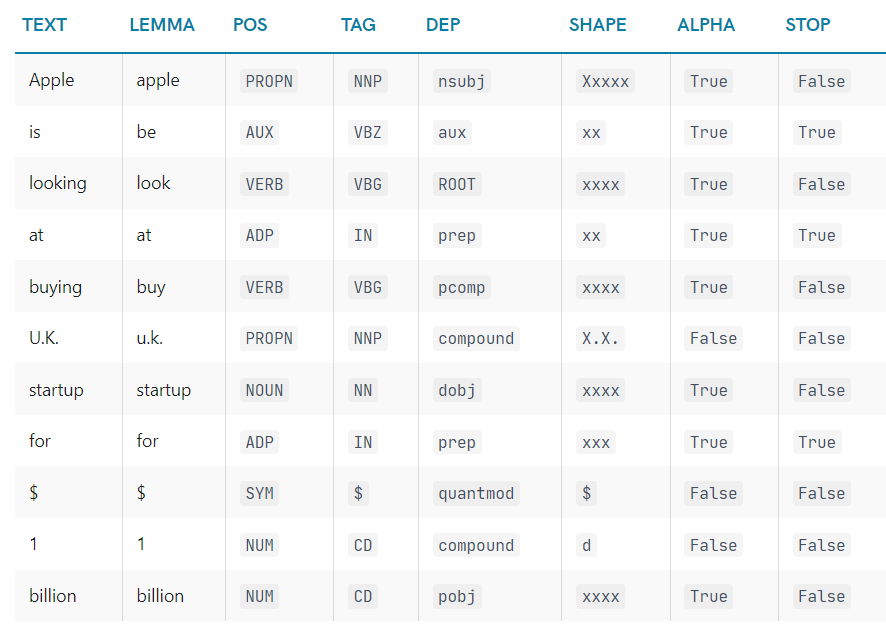

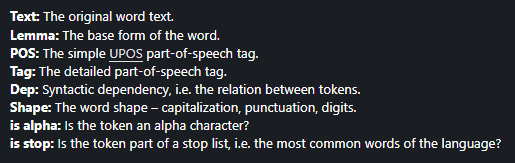

UPOS: Universal POS tags

**Visualizing the dependency parse**

In [71]:
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True)

In [18]:
## More examples from spacy website

# Named Entities
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


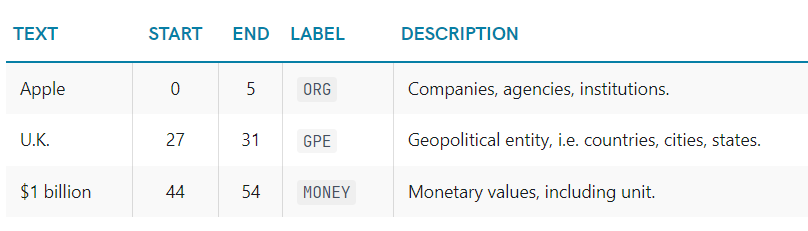

## Tokenise

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. Each `doc` consists of individual tokens, and we can iterate over them:

In [17]:
# only show the results
# spaCy has done it already
for i, token in enumerate(doc):
    print('%2d| %r' % (i+1, token.text)) # token.text
    if token.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| '\n\n'
 9| 'For'
10| 'five'
11| 'hundred'
12| 'years'
13| ','
14| 'every'
15| 'ship'
16| 'that'
17| 'has'
18| 'borne'
19| 'the'
20| 'name'
21| 'of'
22| 'the'
23| 'Enterprise'
24| 'has'
25| 'become'
26| 'a'
27| 'legend'
28| '.'


In [18]:
## %-formatting
# %s for str
# %2d for numeric
# %r for repr()?

print('%2d| %r' % (i+1, token.text)) # token.text

28| '.'


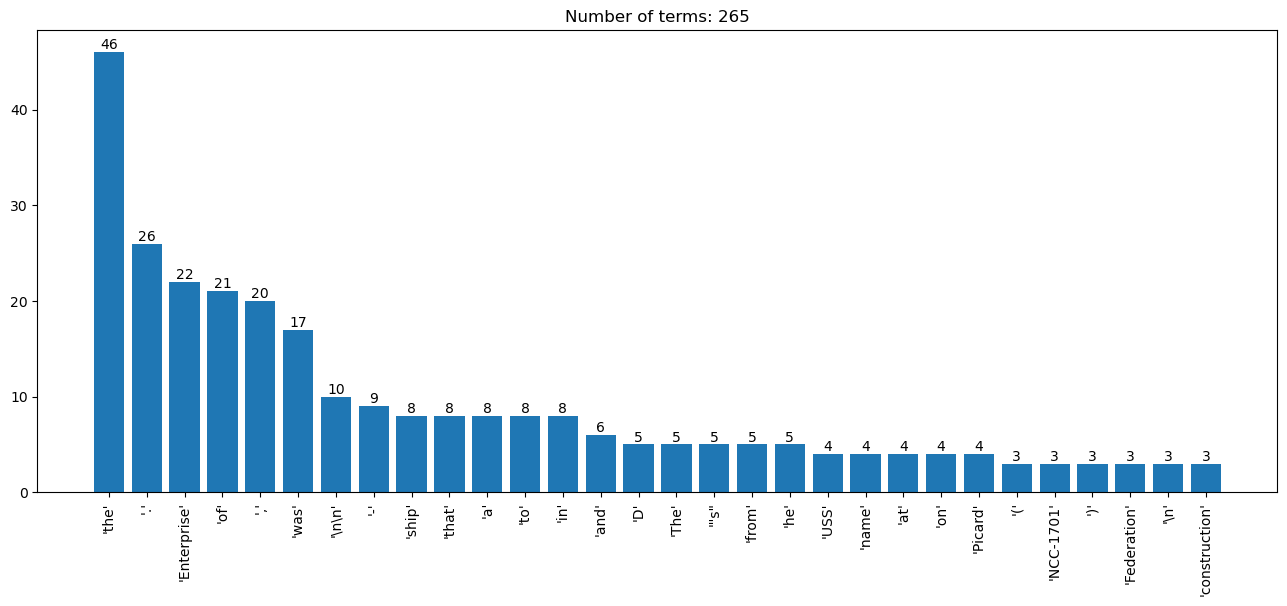

In [19]:
plot_words(['%r' % token.text for token in doc])

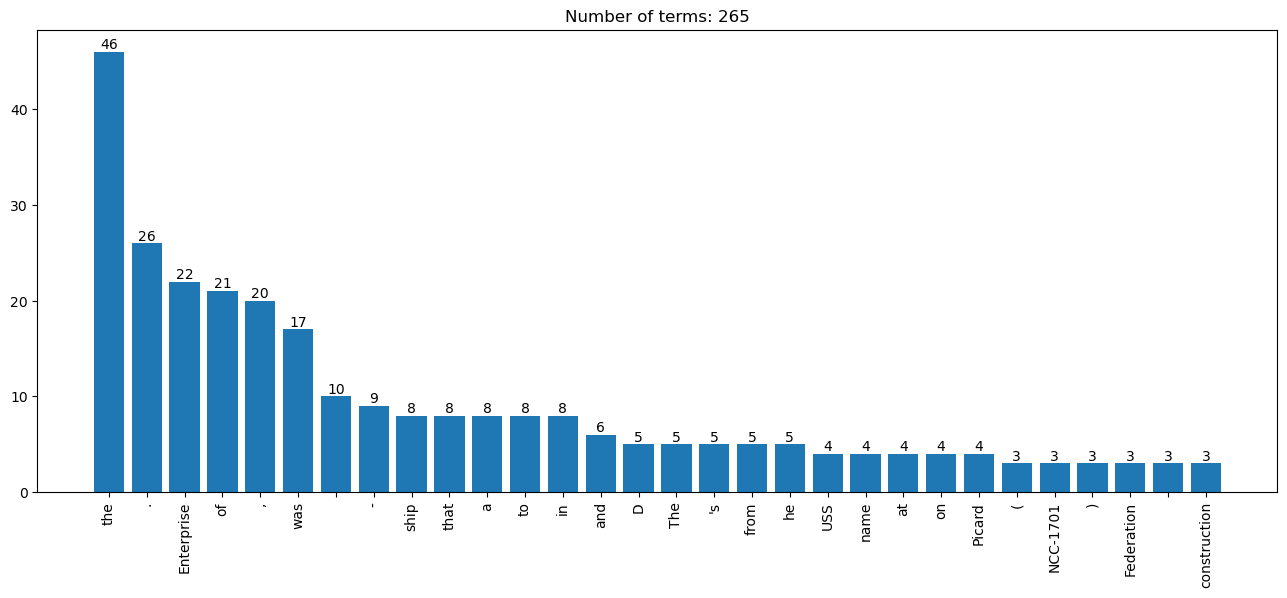

In [20]:
# equals...
plot_words([token.text for token in doc])

# list comprehension for
# for token in doc:
#    print(token.text)

### Stop Words

In [21]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, token in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, token.text, ('' if token.is_stop else token.text))) # token.is_stop: token is stop word

    # break after the first sentence
    if token.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| '\n\n'          '\n\n'
 9| 'For'           ''
10| 'five'          ''
11| 'hundred'       ''
12| 'years'         'years'
13| ','             ','
14| 'every'         ''
15| 'ship'          'ship'
16| 'that'          ''
17| 'has'           ''
18| 'borne'         'borne'
19| 'the'           ''
20| 'name'          ''
21| 'of'            ''
22| 'the'           ''
23| 'Enterprise'    'Enterprise'
24| 'has'           ''
25| 'become'        ''
26| 'a'             ''
27| 'legend'        'legend'
28| '.'             '.'


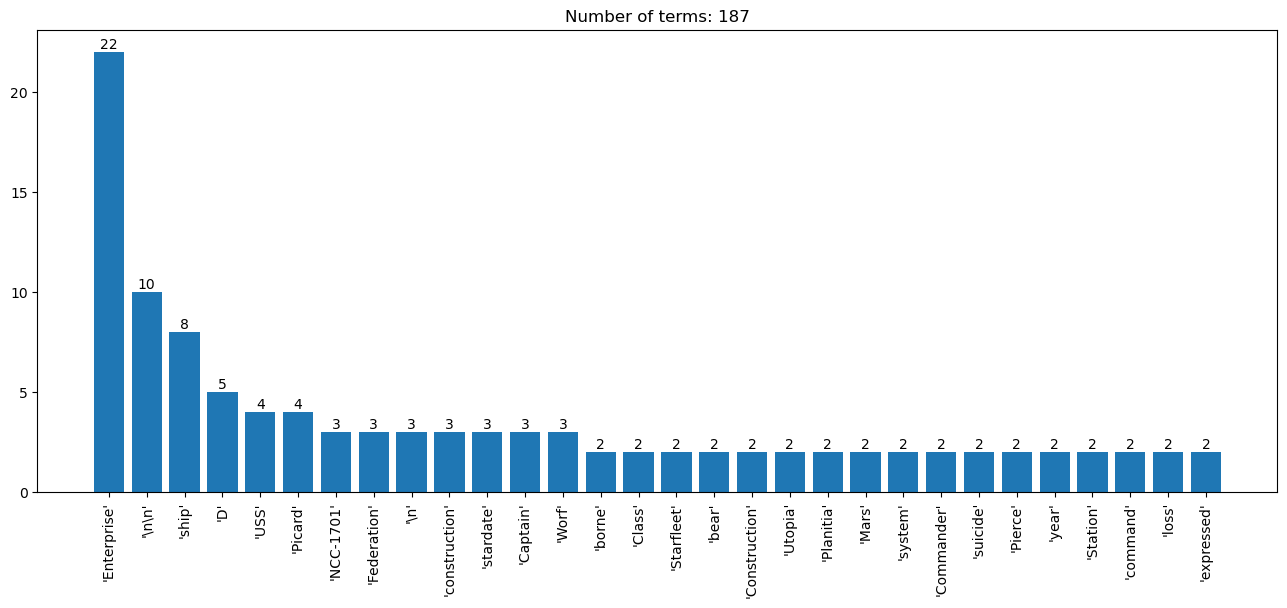

In [22]:
plot_words(['%r' % token.text for token in doc if not (token.is_stop | token.is_punct)])

### Check Part of Speech

In [23]:
## spaCy
for i, token in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, token.text, token.pos_, token.tag_)) # token.pos_, token.tag_
    if token.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : NOUN  NN
 7|')'          : PUNCT -RRB-
 8|'\n\n'       : SPACE _SP
 9|'For'        : ADP   IN
10|'five'       : NUM   CD
11|'hundred'    : NUM   CD
12|'years'      : NOUN  NNS
13|','          : PUNCT ,
14|'every'      : DET   DT
15|'ship'       : NOUN  NN
16|'that'       : PRON  WDT
17|'has'        : AUX   VBZ
18|'borne'      : VERB  VBN
19|'the'        : DET   DT
20|'name'       : NOUN  NN
21|'of'         : ADP   IN
22|'the'        : DET   DT
23|'Enterprise' : PROPN NNP
24|'has'        : AUX   VBZ
25|'become'     : VERB  VBN
26|'a'          : DET   DT
27|'legend'     : NOUN  NN
28|'.'          : PUNCT .


### Lemmatisation

In [57]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, token in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, token.text, token.lemma_)) # token.lemma_
    if token.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'd'
 7| ')'          ')'
 8| '\n\n'       '\n\n'
 9| 'For'        'for'
10| 'five'       'five'
11| 'hundred'    'hundred'
12| 'years'      'year'
13| ','          ','
14| 'every'      'every'
15| 'ship'       'ship'
16| 'that'       'that'
17| 'has'        'have'
18| 'borne'      'bear'
19| 'the'        'the'
20| 'name'       'name'
21| 'of'         'of'
22| 'the'        'the'
23| 'Enterprise' 'Enterprise'
24| 'has'        'have'
25| 'become'     'become'
26| 'a'          'a'
27| 'legend'     'legend'
28| '.'          '.'


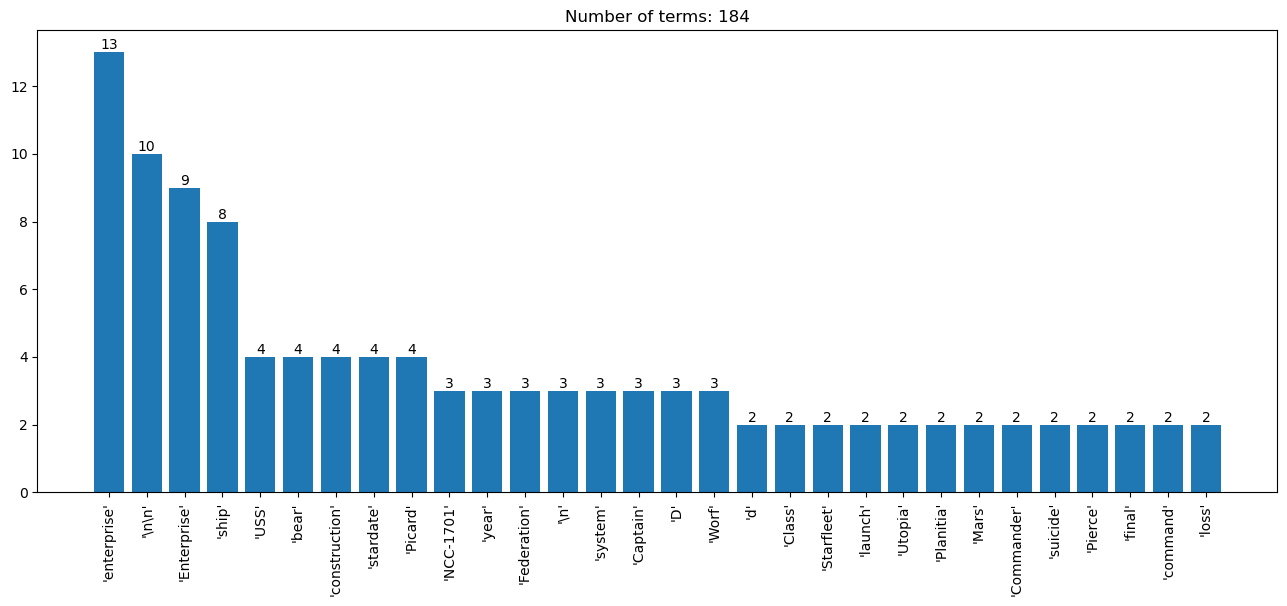

In [58]:
plot_words(['%r' % token.lemma_ for token in doc if not (token.is_stop | token.is_punct)])

### Entity Recognition

In [24]:
## spaCy
for i, s in enumerate(doc.sents): # entity recognition in sentence
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
ORG        : Enterprise
 1: This one is no different.
 2: The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
PRODUCT    : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy Class
ORG        : Starfleet
ORDINAL    : fifth
ORG        : Enterprise
 3: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
ORG        : Federation
 4: The Enterprise was destroyed during the Battle o

## Extra: Using NLTK for NLP

### Tokenise

In [25]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, token in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, token))

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| 'For'
 7| 'five'
 8| 'hundred'
 9| 'years'
10| ','
11| 'every'
12| 'ship'
13| 'that'
14| 'has'
15| 'borne'
16| 'the'
17| 'name'
18| 'of'
19| 'the'
20| 'Enterprise'
21| 'has'
22| 'become'
23| 'a'
24| 'legend'
25| '.'


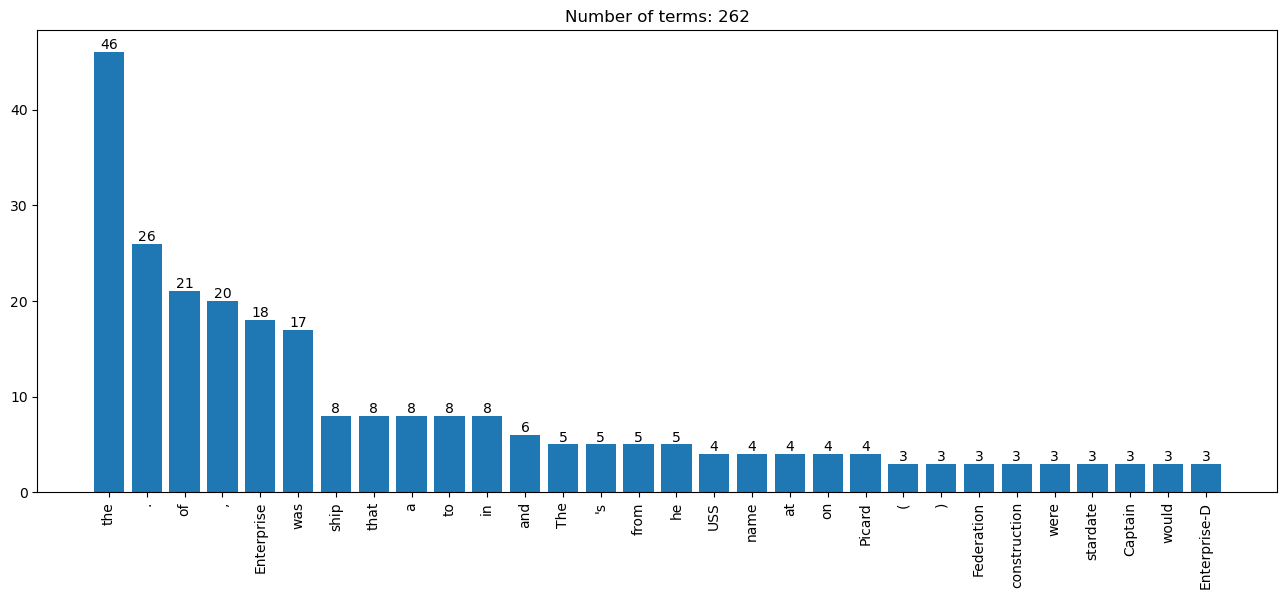

In [26]:
plot_words(tokens)

### Stop words

In [27]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [28]:
# create a list of tokens withOUT the stop words
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [t for t in tokens if t.lower() not in stopWords]

In [29]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701-D'    'NCC-1701-D'
 5| ')'             ')'
 6| 'For'          
 7| 'five'          'five'
 8| 'hundred'       'hundred'
 9| 'years'         'years'
10| ','             ','
11| 'every'         'every'
12| 'ship'          'ship'
13| 'that'         
14| 'has'          
15| 'borne'         'borne'
16| 'the'          
17| 'name'          'name'
18| 'of'           
19| 'the'          
20| 'Enterprise'    'Enterprise'
21| 'has'          
22| 'become'        'become'
23| 'a'            
24| 'legend'        'legend'
25| '.'             '.'


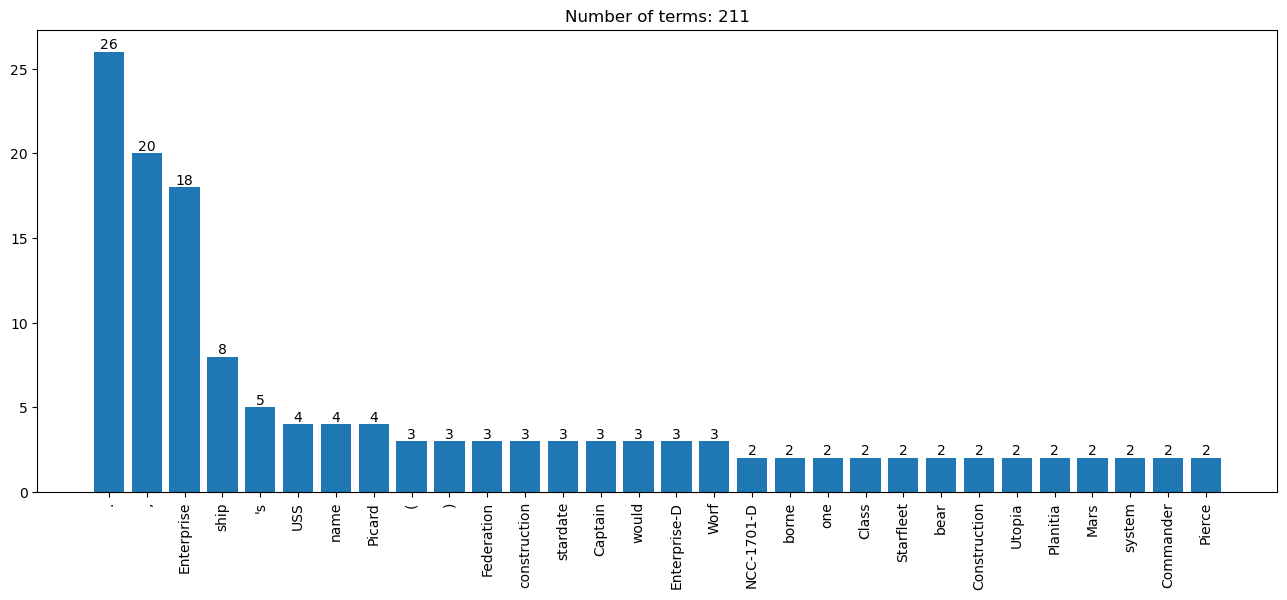

In [30]:
# Create plot of words without stopword
plot_words(tokens_no_stop)

### Check Part of Speech

In [31]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [32]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'('          : (    -
 4|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
 5|')'          : )    -
 6|'For'        : IN   preposition/subordinating conjunction
 7|'five'       : CD   cardinal digit
 8|'hundred'    : CD   cardinal digit
 9|'years'      : NNS  noun plural "desks"
10|','          : ,    -
11|'every'      : DT   determiner
12|'ship'       : NN   noun, singular "desk"
13|'that'       : WDT  wh-determiner which
14|'has'        : VBZ  verb, 3rd person sing. present takes
15|'borne'      : VBN  verb, past participle taken
16|'the'        : DT   determiner
17|'name'       : NN   noun, singular "desk"
18|'of'         : IN   preposition/subordinating conjunction
19|'the'        : DT   determiner
20|'Enterprise' : NNP  proper noun, singular "Harrison"
21|'has'        : VBZ  verb, 3rd person sing. present takes
22|'become'     : VBN  verb, past participle taken
23|

In [41]:
tagged

[('USS', 'NNP'),
 ('Enterprise', 'NNP'),
 ('(', '('),
 ('NCC-1701-D', 'NNP'),
 (')', ')'),
 ('For', 'IN'),
 ('five', 'CD'),
 ('hundred', 'CD'),
 ('years', 'NNS'),
 (',', ','),
 ('every', 'DT'),
 ('ship', 'NN'),
 ('that', 'WDT'),
 ('has', 'VBZ'),
 ('borne', 'VBN'),
 ('the', 'DT'),
 ('name', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Enterprise', 'NNP'),
 ('has', 'VBZ'),
 ('become', 'VBN'),
 ('a', 'DT'),
 ('legend', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('one', 'CD'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('different', 'JJ'),
 ('.', '.'),
 ('The', 'DT'),
 ('USS', 'NNP'),
 ('Enterprise', 'NNP'),
 ('(', '('),
 ('NCC-1701-D', 'NNP'),
 (')', ')'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('24th', 'JJ'),
 ('century', 'NN'),
 ('United', 'NNP'),
 ('Federation', 'NNP'),
 ('of', 'IN'),
 ('Planets', 'NNP'),
 ('Galaxy', 'NNP'),
 ('Class', 'NNP'),
 ('starship', 'NN'),
 ('operated', 'VBN'),
 ('by', 'IN'),
 ('Starfleet', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('fifth', 'JJ'),
 ('Federation', 'NNP'),
 ('

In [39]:
type(tagged)

list

### Stemming

In [51]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

In [52]:
stemmed

"uss enterpris (ncc-1701-d) for five hundr years, everi ship that ha born the name of the enterpris ha becom a legend. thi one is no different. the uss enterpris (ncc-1701-d) wa a 24th centuri unit feder of planet galaxi class starship oper by starfleet, and the fifth feder ship to bear the name enterprise. dure her career, the enterpris serv as the feder flagship. the enterpris wa destroy dure the battl of veridian iii in 2371. histori construct and launch the enterpris wa built at utopia planitia fleet yard orbit mar in the solar system. the construct wa a massiv undertaking, involv thousand of peopl across disciplines. construct wa supervis by command orfil quinteros. dr. leah brahm wa respons for much of the enterprise' warp propuls system design. some of the enterprise' compon were deriv from technolog origin develop on the uss pegasus. one of the ship' nacel tube wa the site of a multipl murder-suicid while she wa still under construct at utopia planitia. a member of the construc

In [53]:
text

"USS Enterprise (NCC-1701-D)\n\nFor five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.\n\nThe USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.\n\nHistory\nConstruction and launch\nThe Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.\n\nOne of the ship's nacelle tube was 

### Lemmatisation

In [54]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [55]:
lemma

"USS Enterprise (NCC-1701-D) For five hundred years, every ship that ha borne the name of the Enterprise ha become a legend. This one is no different. The USS Enterprise (NCC-1701-D) wa a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served a the Federation flagship. The Enterprise wa destroyed during the Battle of Veridian III in 2371. History Construction and launch The Enterprise wa built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction wa a massive undertaking, involving thousand of people across disciplines. Construction wa supervised by Commander Orfil Quinteros. Dr. Leah Brahms wa responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's component were derived from technology originally developed on the USS Pegasus. One of the ship's nacelle tube wa the site of a multiple mur

In [56]:
text

"USS Enterprise (NCC-1701-D)\n\nFor five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.\n\nThe USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.\n\nHistory\nConstruction and launch\nThe Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.\n\nOne of the ship's nacelle tube was 

In [57]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| 'for'          'For'       
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


In [58]:
dot

123

In [59]:
sl

['uss',
 'enterpris',
 '(ncc-1701-d)',
 'for',
 'five',
 'hundr',
 'years,',
 'everi',
 'ship',
 'that',
 'ha',
 'born',
 'the',
 'name',
 'of',
 'the',
 'enterpris',
 'ha',
 'becom',
 'a',
 'legend.']

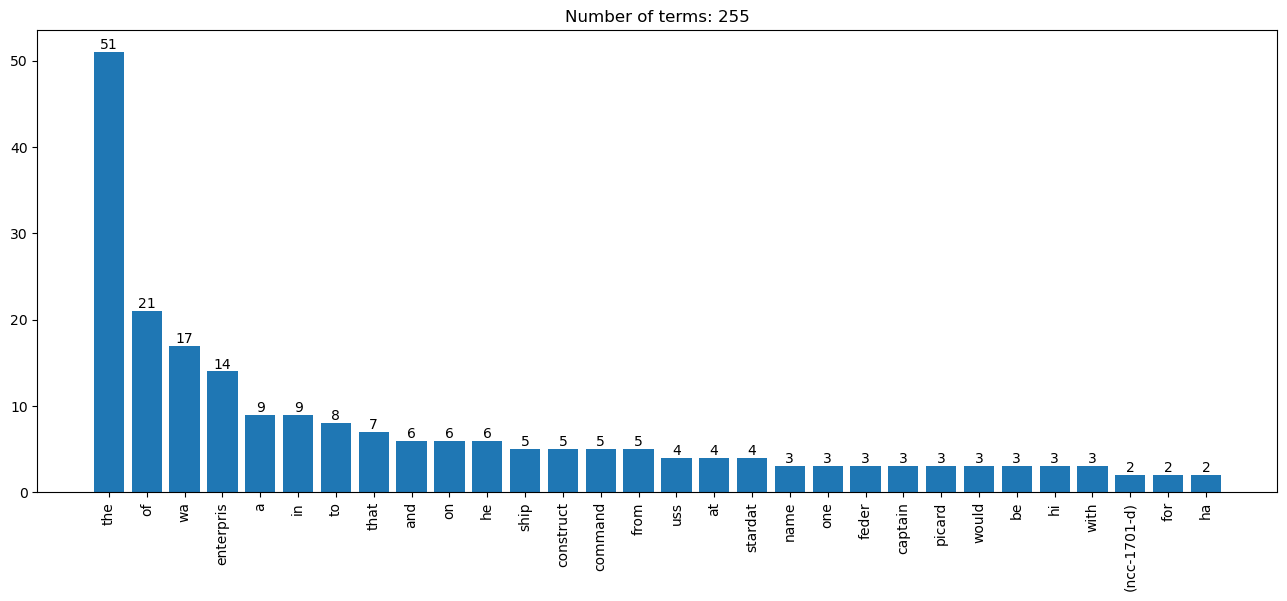

In [60]:
plot_words(stemmed.split())

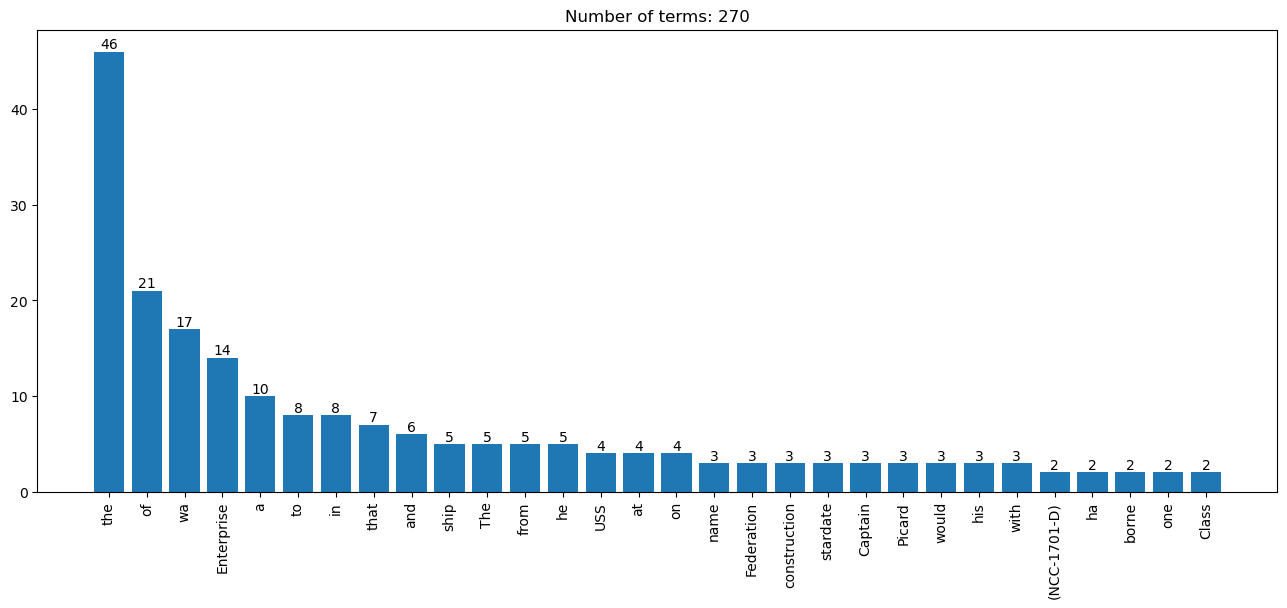

In [61]:
plot_words(lemma.split())

### Entity recognition

In [62]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
PERSON      : History Construction
ORGANIZATION: Enterprise
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain Jean-Luc Picard
ORGANIZATION: Rear Admiral Norah Satie
PERSON      : Legacy Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
PERSON      : Deep Space
GPE         : Sta

In [67]:
from svgling import draw_tree

entities

In [66]:
print(entities)

(S
  (ORGANIZATION USS/NNP Enterprise/NNP)
  (/(
  NCC-1701-D/NNP
  )/)
  For/IN
  five/CD
  hundred/CD
  years/NNS
  ,/,
  every/DT
  ship/NN
  that/WDT
  has/VBZ
  borne/VBN
  the/DT
  name/NN
  of/IN
  the/DT
  (ORGANIZATION Enterprise/NNP)
  has/VBZ
  become/VBN
  a/DT
  legend/NN
  ./.
  This/DT
  one/CD
  is/VBZ
  no/DT
  different/JJ
  ./.
  The/DT
  (ORGANIZATION USS/NNP Enterprise/NNP)
  (/(
  NCC-1701-D/NNP
  )/)
  was/VBD
  a/DT
  24th/JJ
  century/NN
  (PERSON United/NNP Federation/NNP)
  of/IN
  (ORGANIZATION Planets/NNP Galaxy/NNP)
  Class/NNP
  starship/NN
  operated/VBN
  by/IN
  (PERSON Starfleet/NNP)
  ,/,
  and/CC
  the/DT
  fifth/JJ
  Federation/NNP
  ship/NN
  to/TO
  bear/VB
  the/DT
  name/NN
  Enterprise/NNP
  ./.
  During/IN
  her/PRP$
  career/NN
  ,/,
  the/DT
  (ORGANIZATION Enterprise/NNP)
  served/VBD
  as/IN
  the/DT
  (ORGANIZATION Federation/NNP)
  flagship/NN
  ./.
  The/DT
  (ORGANIZATION Enterprise/NN)
  was/VBD
  destroyed/VBN
  during/IN
  the/DT
 



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



